<a href="https://colab.research.google.com/github/pablitocito/Diffusion_model_project/blob/main/sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion model

### Packages

In [ ]:
#local %pip install -r C:/Users/UTILISATEUR/Desktop/M2/Diffusion_model_project/requirements.txt
!pip3 install --upgrade pip
!pip3 install einops

In [1]:
import numpy as np
import random


from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import einops
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader

from torchvision.transforms import Compose, ToTensor, Lambda
from torchvision.datasets.mnist import MNIST, FashionMNIST

from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline

ModuleNotFoundError: ignored

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# Getting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}\t" + (f"{torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "CPU"))

Using device: cpu	CPU


In [ ]:
# Setting reproducibility
SEED = 63
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

### Execution option


In [ ]:
no_train = False #to train model from scratch
fashion = True #to use fashion-MNIST dataset
batch_size = 128
n_epochs = 20
lr = 0.001

In [ ]:
store_path = "ddpm_fashion.pt"

### Utility functions

In [ ]:
def show_images(images, title=""):
    """Shows the provided images as sub-pictures in a square"""

    # Converting images to CPU numpy arrays
    if type(images) is torch.Tensor:
        images = images.detach().cpu().numpy()

    # Defining number of rows and columns
    fig = plt.figure(figsize=(8, 8))
    rows = int(len(images) ** (1 / 2))
    cols = round(len(images) / rows)

    # Populating figure with sub-plots
    idx = 0
    for r in range(rows):
        for c in range(cols):
            fig.add_subplot(rows, cols, idx + 1)

            if idx < len(images):
                plt.imshow(images[idx][0], cmap="gray")
                idx += 1
    fig.suptitle(title, fontsize=30)

    # Showing the figure
    plt.show()

In [ ]:
def show_first_batch(loader):
    for batch in loader:
        show_images(batch[0], "Images in the first batch")
        break

### Load Dataset

**Note** : It is important to normalize images in range [-1,1] and not [0,1] as one might usually do. DDPM network predicts normally distributed noises throughout the denoising process.

In [ ]:
# Loading the data (converting each image into a tensor and normalizing between [-1, 1])
transform = Compose([
    ToTensor(),
    Lambda(lambda x: (x - 0.5) * 2)]
)
ds_fn = FashionMNIST
dataset = ds_fn("./datasets", download=True, train=True, transform=transform)
loader = DataLoader(dataset, batch_size, shuffle=True)

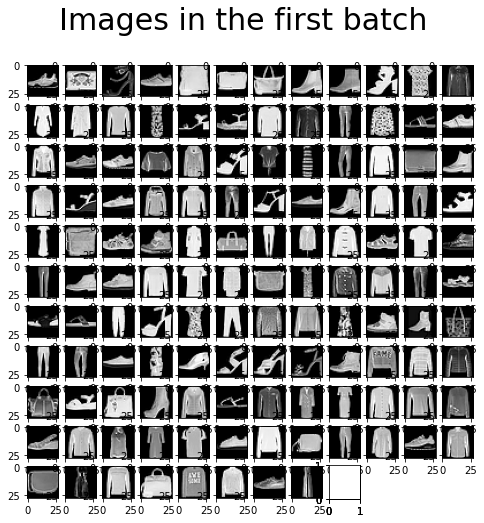

In [ ]:
# Optionally, show a batch of regular images
show_first_batch(loader)